In [2]:
import pandas as pd
import numpy as np
import seaborn as sns  # visualisation
import matplotlib.pyplot as plt

# Replace 'your_data.csv' with the actual name of your CSV file
file_path = "./train_input.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
np.random.seed(42)

: 

In [3]:
df.head(5)

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,NaN,NaN,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,2200.3,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,1973.3,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,NaN,NaN,NaN,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,NaN,NaN,NaN,171,1,5,11,786,40044.4,2


In [4]:
df.dtypes


Feature 1 (Discrete)            int64
Feature 2 (Discrete)            int64
Feature 3 (Discrete)            int64
Feature 4 (Discrete)            int64
Feature 5 (Discrete)            int64
Feature 6 (Discrete)            int64
Feature 7 (Discrete)            int64
Feature 8 (Discrete)            int64
Feature 9                     float64
Feature 10                    float64
Feature 11                    float64
Feature 12                    float64
Feature 13                    float64
Feature 14                    float64
Feature 15                    float64
Feature 16                    float64
Feature 17                    float64
Feature 18                    float64
Feature 19 (Discrete)           int64
Feature 20 (Discrete)           int64
Feature 21 (Discrete)           int64
Feature 22 (Discrete)           int64
Feature 23 (Discrete)           int64
Feature 24                    float64
Target Variable (Discrete)      int64
dtype: object

In [5]:
df.shape


(994, 25)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 25)


In [7]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant Features:", constant_features)

Constant Features: []


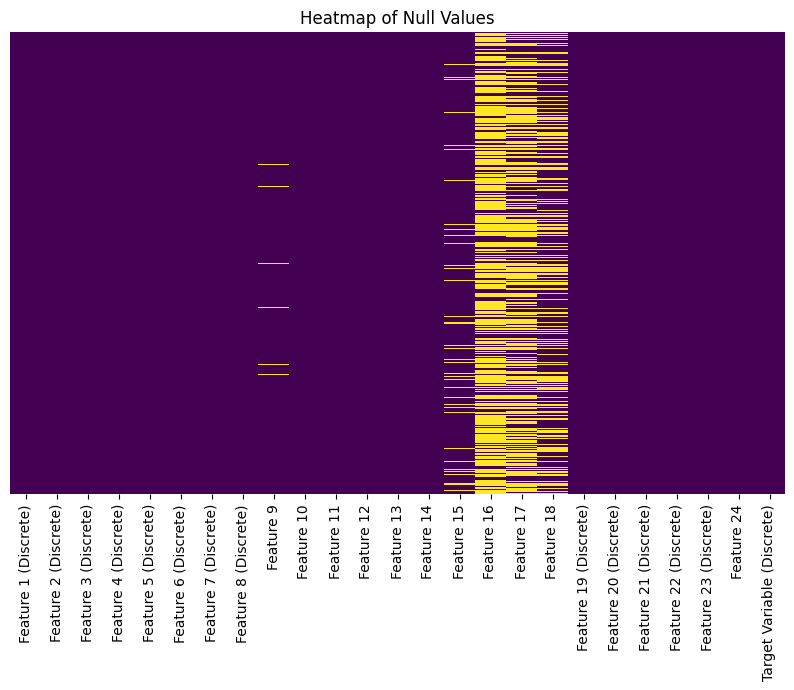

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()

In [8]:
df.shape


(994, 25)

In [9]:
missing_values_count = df.isnull().sum()

# Display the total number of missing values for each column
print("Total number of missing values for each column:")
print(missing_values_count)

Total number of missing values for each column:
Feature 1 (Discrete)            0
Feature 2 (Discrete)            0
Feature 3 (Discrete)            0
Feature 4 (Discrete)            0
Feature 5 (Discrete)            0
Feature 6 (Discrete)            0
Feature 7 (Discrete)            0
Feature 8 (Discrete)            0
Feature 9                      14
Feature 10                      1
Feature 11                      1
Feature 12                      1
Feature 13                      1
Feature 14                      1
Feature 15                     72
Feature 16                    669
Feature 17                    546
Feature 18                    330
Feature 19 (Discrete)           0
Feature 20 (Discrete)           0
Feature 21 (Discrete)           0
Feature 22 (Discrete)           0
Feature 23 (Discrete)           0
Feature 24                      1
Target Variable (Discrete)      0
dtype: int64


In [10]:
df = df.drop(columns=["Feature 16", "Feature 17"])
df.shape

(994, 23)

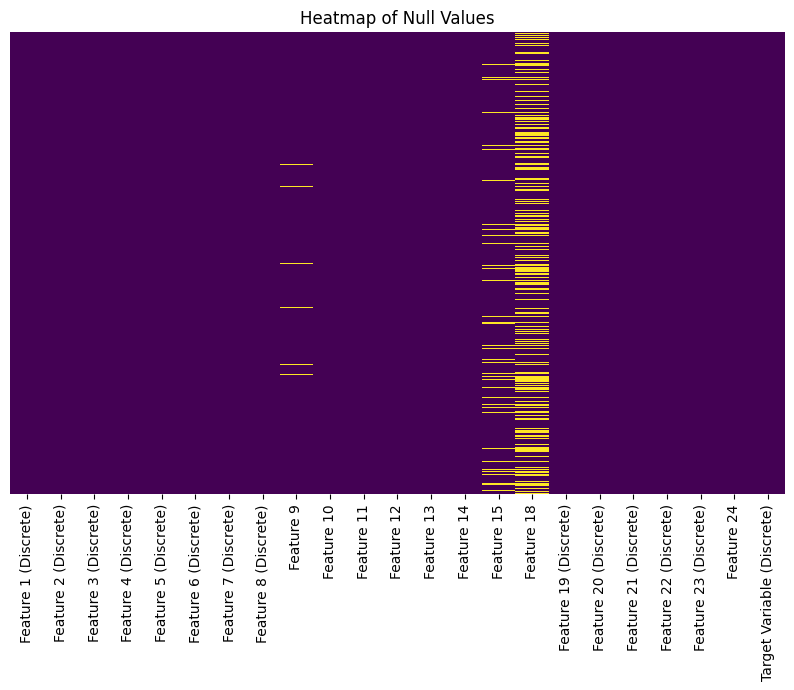

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()

In [13]:
Discrete_Columns = ["Feature 24"]  
NonDiscrete_Columns = ["Feature 15", "Feature 18","Feature 9","Feature 10","Feature 11","Feature 12","Feature 13","Feature 14"] 

# Impute missing values in discrete features with mode
for column in Discrete_Columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Impute missing values in non-discrete features with mean
for column in NonDiscrete_Columns:
    df[column].fillna(df[column].mean(), inplace=True)

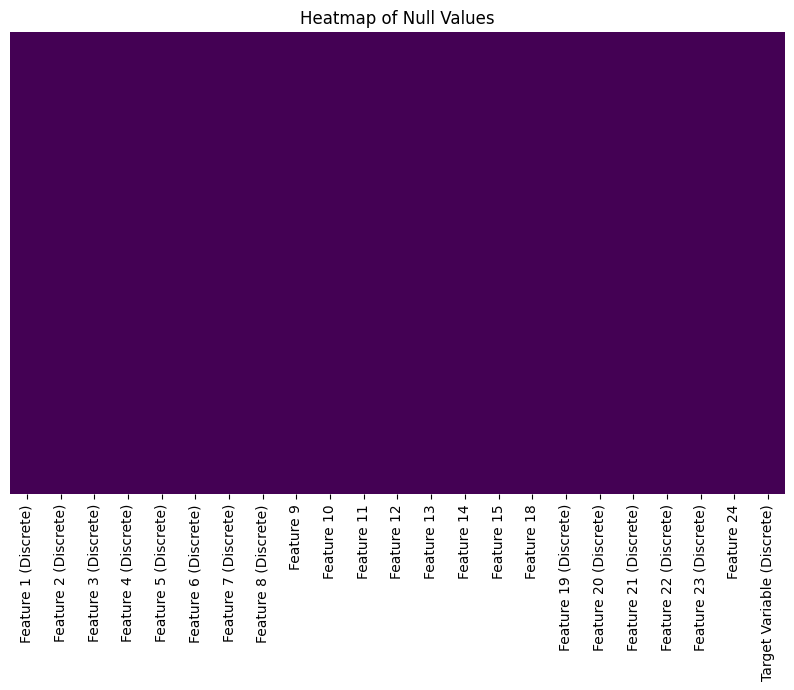

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()

In [15]:
missing_values_count = df.isnull().sum()

# Display the total number of missing values for each column
print("Total number of missing values for each column:")
print(missing_values_count)

Total number of missing values for each column:
Feature 1 (Discrete)          0
Feature 2 (Discrete)          0
Feature 3 (Discrete)          0
Feature 4 (Discrete)          0
Feature 5 (Discrete)          0
Feature 6 (Discrete)          0
Feature 7 (Discrete)          0
Feature 8 (Discrete)          0
Feature 9                     0
Feature 10                    0
Feature 11                    0
Feature 12                    0
Feature 13                    0
Feature 14                    0
Feature 15                    0
Feature 18                    0
Feature 19 (Discrete)         0
Feature 20 (Discrete)         0
Feature 21 (Discrete)         0
Feature 22 (Discrete)         0
Feature 23 (Discrete)         0
Feature 24                    0
Target Variable (Discrete)    0
dtype: int64


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Feature 1 (Discrete)            706.750000
Feature 2 (Discrete)              8.000000
Feature 3 (Discrete)            172.750000
Feature 4 (Discrete)             13.000000
Feature 5 (Discrete)              2.000000
Feature 6 (Discrete)              1.000000
Feature 7 (Discrete)              0.000000
Feature 8 (Discrete)              3.000000
Feature 9                         0.004000
Feature 10                    35149.100000
Feature 11                    35110.725000
Feature 12                        0.001387
Feature 13                       97.375500
Feature 14                     1338.381000
Feature 15                     2993.225000
Feature 18                     2053.776852
Feature 19 (Discrete)           140.000000
Feature 20 (Discrete)            11.000000
Feature 21 (Discrete)             6.000000
Feature 22 (Discrete)            49.750000
Feature 23 (Discrete)           706.750000
Feature 24                    11666.475000
Target Variable (Discrete)        1.750000
dtype: floa

In [17]:
df.shape

(994, 23)

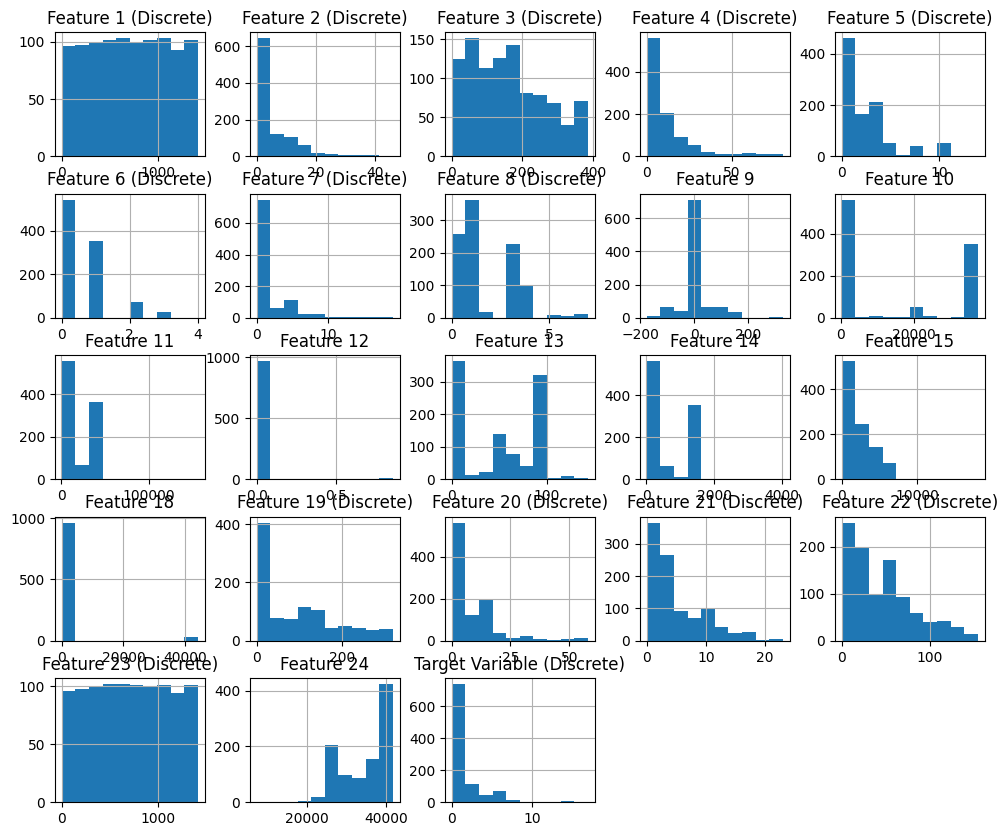

In [18]:
df.hist(figsize=(12, 10))
plt.show()

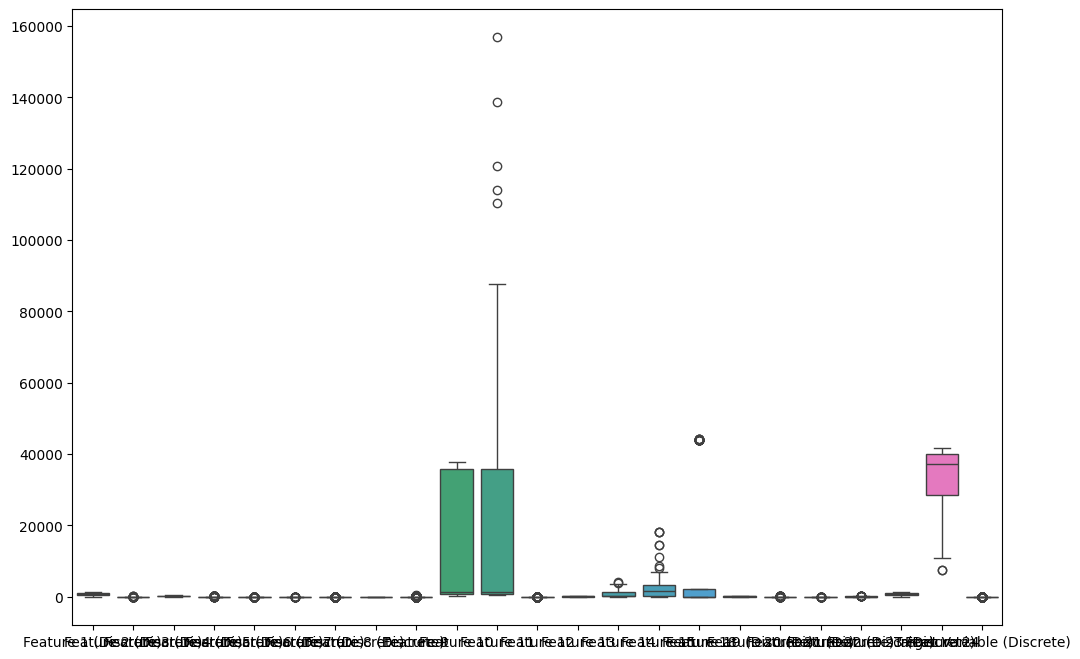

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

sns.pairplot(df)
plt.show()

In [20]:
file_path2 = './test_input.csv'
df_test = pd.read_csv(file_path2)
df_test.shape

(426, 24)

In [21]:
missing_values_count_test = df_test.isnull().sum()

# Display the total number of missing values for each column
print("Total number of missing values for each column in test:")
print(missing_values_count_test)

Total number of missing values for each column in test:
Feature 1 (Discrete)       0
Feature 2 (Discrete)       0
Feature 3 (Discrete)       0
Feature 4 (Discrete)       0
Feature 5 (Discrete)       0
Feature 6 (Discrete)       0
Feature 7 (Discrete)       0
Feature 8 (Discrete)       0
Feature 9                  4
Feature 10                 0
Feature 11                 0
Feature 12                 0
Feature 13                 0
Feature 14                 2
Feature 15                31
Feature 16               279
Feature 17               225
Feature 18               114
Feature 19 (Discrete)      0
Feature 20 (Discrete)      0
Feature 21 (Discrete)      0
Feature 22 (Discrete)      0
Feature 23 (Discrete)      0
Feature 24                 0
dtype: int64


In [22]:
df_test.shape
df_test = df_test.drop(columns=["Feature 16", "Feature 17"])
print(df_test.shape)

(426, 22)


In [23]:

df_test.shape
missing_values_count_test = df_test.isnull().sum()

# Display the total number of missing values for each column
print("Total number of missing values for each column in test:")
print(missing_values_count_test)

Total number of missing values for each column in test:
Feature 1 (Discrete)       0
Feature 2 (Discrete)       0
Feature 3 (Discrete)       0
Feature 4 (Discrete)       0
Feature 5 (Discrete)       0
Feature 6 (Discrete)       0
Feature 7 (Discrete)       0
Feature 8 (Discrete)       0
Feature 9                  4
Feature 10                 0
Feature 11                 0
Feature 12                 0
Feature 13                 0
Feature 14                 2
Feature 15                31
Feature 18               114
Feature 19 (Discrete)      0
Feature 20 (Discrete)      0
Feature 21 (Discrete)      0
Feature 22 (Discrete)      0
Feature 23 (Discrete)      0
Feature 24                 0
dtype: int64


In [24]:
NonDiscrete_Columns_test = ["Feature 9", "Feature 14","Feature 15","Feature 18"] 
for column in NonDiscrete_Columns_test:
    df_test[column].fillna(df_test[column].mean(), inplace=True)

In [25]:
missing_values_count_test = df_test.isnull().sum()

# Display the total number of missing values for each column
print("Total number of missing values for each column in test:")
print(missing_values_count_test)

Total number of missing values for each column in test:
Feature 1 (Discrete)     0
Feature 2 (Discrete)     0
Feature 3 (Discrete)     0
Feature 4 (Discrete)     0
Feature 5 (Discrete)     0
Feature 6 (Discrete)     0
Feature 7 (Discrete)     0
Feature 8 (Discrete)     0
Feature 9                0
Feature 10               0
Feature 11               0
Feature 12               0
Feature 13               0
Feature 14               0
Feature 15               0
Feature 18               0
Feature 19 (Discrete)    0
Feature 20 (Discrete)    0
Feature 21 (Discrete)    0
Feature 22 (Discrete)    0
Feature 23 (Discrete)    0
Feature 24               0
dtype: int64


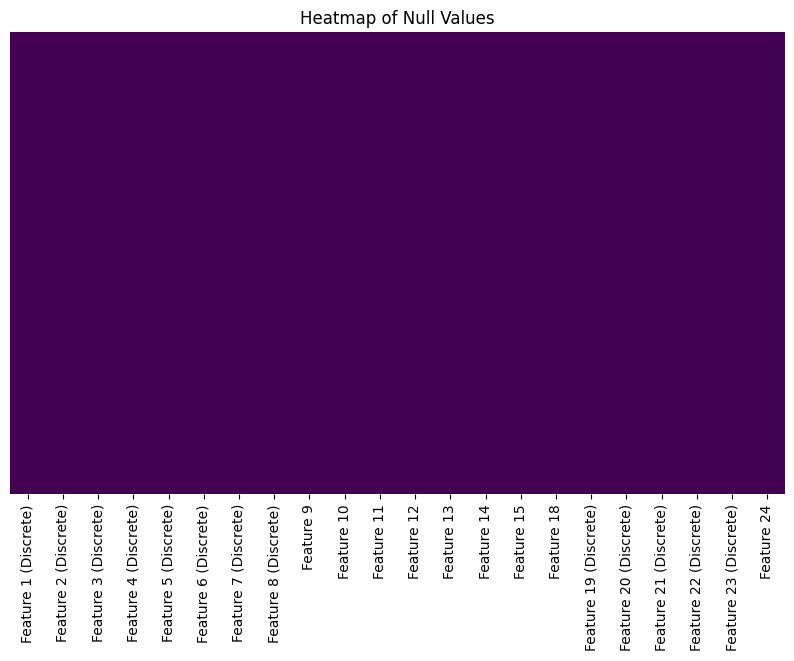

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
feature_columns = ["Feature 1 (Discrete)","Feature 2 (Discrete)","Feature 3 (Discrete)","Feature 4 (Discrete)","Feature 5 (Discrete)","Feature 6 (Discrete)","Feature 7 (Discrete)","Feature 8 (Discrete)","Feature 9","Feature 10","Feature 11","Feature 12","Feature 13","Feature 14","Feature 15","Feature 18","Feature 19 (Discrete)","Feature 20 (Discrete)","Feature 21 (Discrete)","Feature 22 (Discrete)","Feature 23 (Discrete)","Feature 24"]

# Separate features (X) and target variable (y) for training data
X_train = df[feature_columns]
y_train = df["Target Variable (Discrete)"]

X_test = df_test[feature_columns]

gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)


In [28]:
print(df_test.columns)


Index(['Feature 1 (Discrete)', 'Feature 2 (Discrete)', 'Feature 3 (Discrete)',
       'Feature 4 (Discrete)', 'Feature 5 (Discrete)', 'Feature 6 (Discrete)',
       'Feature 7 (Discrete)', 'Feature 8 (Discrete)', 'Feature 9',
       'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14',
       'Feature 15', 'Feature 18', 'Feature 19 (Discrete)',
       'Feature 20 (Discrete)', 'Feature 21 (Discrete)',
       'Feature 22 (Discrete)', 'Feature 23 (Discrete)', 'Feature 24'],
      dtype='object')


In [29]:
submission_df = pd.DataFrame({"Id": df_test.index + 1, "Category": y_pred_gb})

submission_df.to_csv("test_output1.csv", index=False)
print("success")

success
